# Top Mass DCTR Fitting 1D - Correlation and AUC Ensembled over 40 Runs

Here we will analyze the effectiveness of the alternative DCTR fitting algorithm for the top quark mass $m_T$ using (1) only the reconstructed leptonic mass $m_{bl\nu}$, using (2) both the reconstructed leptonic mass $m_{bl\nu}$ and its swapped version$m_{bl\nu,\textrm{swap}}$ (denoted "2Obs"), and finally using (3) the reconstructed leptonic mass $m_{bl\nu}$, the reconstructed hadronic mass $m_{jjj}$, and both of their swapped versions $m_{bl\nu, \textrm{swap}}$ and $m_{jjj,\textrm{swap}}$ (denoted "4Obs").

In [1]:
# standard library imports
from __future__ import absolute_import, division, print_function

import numpy as np

import scipy as sp
import scipy.interpolate as interpolate
import scipy.misc as misc
import scipy.optimize as optimize

from matplotlib import pyplot as plt

## Process Data

In [2]:
data_dir = '/global/cscratch1/sd/asuresh/data/TopQuarkFitting/'

In [3]:
thetas = np.linspace(170, 180, 21)

part_cor_mblv = np.empty((0, len(thetas)))
part_lvals_mblv = np.empty((0, len(thetas)))
part_vlvals_mblv = np.empty((0, len(thetas)))
part_AUC_mblv = np.empty((0, len(thetas)))

det_cor_mblv = np.empty((0, len(thetas)))
det_lvals_mblv = np.empty((0, len(thetas)))
det_vlvals_mblv = np.empty((0, len(thetas)))
det_AUC_mblv = np.empty((0, len(thetas)))

part_cor_2Obs = np.empty((0, len(thetas)))
part_lvals_2Obs = np.empty((0, len(thetas)))
part_vlvals_2Obs = np.empty((0, len(thetas)))
part_AUC_2Obs = np.empty((0, len(thetas)))

det_cor_2Obs = np.empty((0, len(thetas)))
det_lvals_2Obs = np.empty((0, len(thetas)))
det_vlvals_2Obs = np.empty((0, len(thetas)))
det_AUC_2Obs = np.empty((0, len(thetas)))

part_cor_4Obs = np.empty((0, len(thetas)))
part_lvals_4Obs = np.empty((0, len(thetas)))
part_vlvals_4Obs = np.empty((0, len(thetas)))
part_AUC_4Obs = np.empty((0, len(thetas)))

det_cor_4Obs = np.empty((0, len(thetas)))
det_lvals_4Obs = np.empty((0, len(thetas)))
det_vlvals_4Obs = np.empty((0, len(thetas)))
det_AUC_4Obs = np.empty((0, len(thetas)))

In [4]:
for i in range(40):
    file_label = data_dir +"mblvTrials/DCTR_1D_mT-mblv-Trial{}.npz".format(i)
    file = np.load(file_label)
    
    part_cor_mblv = np.append(part_cor_mblv, np.expand_dims(file['part_cor'], axis = 0), axis = 0)
    part_lvals_mblv = np.append(part_lvals_mblv, np.expand_dims(file['part_lvals'], axis = 0), axis = 0)
    part_vlvals_mblv = np.append(part_vlvals_mblv, np.expand_dims(file['part_vlvals'], axis = 0), axis = 0)
    part_AUC_mblv = np.append(part_AUC_mblv, np.expand_dims(file['part_AUC'], axis = 0), axis = 0)
    
    det_cor_mblv = np.append(det_cor_mblv, np.expand_dims(file['det_cor'], axis = 0), axis = 0)
    det_lvals_mblv = np.append(det_lvals_mblv, np.expand_dims(file['det_lvals'], axis = 0), axis = 0)
    det_vlvals_mblv = np.append(det_vlvals_mblv, np.expand_dims(file['det_vlvals'], axis = 0), axis = 0)
    det_AUC_mblv = np.append(det_AUC_mblv, np.expand_dims(file['det_AUC'], axis = 0), axis = 0)
    
for i in range(40):
    file_label = data_dir +"2ObsTrials/DCTR_1D_mT-2Obs-Trial{}.npz".format(i)
    file = np.load(file_label)
    
    part_cor_2Obs = np.append(part_cor_2Obs, np.expand_dims(file['part_cor'], axis = 0), axis = 0)
    part_lvals_2Obs = np.append(part_lvals_2Obs, np.expand_dims(file['part_lvals'], axis = 0), axis = 0)
    part_vlvals_2Obs = np.append(part_vlvals_2Obs, np.expand_dims(file['part_vlvals'], axis = 0), axis = 0)
    part_AUC_2Obs = np.append(part_AUC_2Obs, np.expand_dims(file['part_AUC'], axis = 0), axis = 0)
    
    det_cor_2Obs = np.append(det_cor_2Obs, np.expand_dims(file['det_cor'], axis = 0), axis = 0)
    det_lvals_2Obs = np.append(det_lvals_2Obs, np.expand_dims(file['det_lvals'], axis = 0), axis = 0)
    det_vlvals_2Obs = np.append(det_vlvals_2Obs, np.expand_dims(file['det_vlvals'], axis = 0), axis = 0)
    det_AUC_2Obs = np.append(det_AUC_2Obs, np.expand_dims(file['det_AUC'], axis = 0), axis = 0)
    
for i in range(40):
    file_label = data_dir +"4ObsTrials/DCTR_1D_mT-4Obs-Trial{}.npz".format(i)
    file = np.load(file_label)
    
    part_cor_4Obs = np.append(part_cor_4Obs, np.expand_dims(file['part_cor'], axis = 0), axis = 0)
    part_lvals_4Obs = np.append(part_lvals_4Obs, np.expand_dims(file['part_lvals'], axis = 0), axis = 0)
    part_vlvals_4Obs = np.append(part_vlvals_4Obs, np.expand_dims(file['part_vlvals'], axis = 0), axis = 0)
    part_AUC_4Obs = np.append(part_AUC_4Obs, np.expand_dims(file['part_AUC'], axis = 0), axis = 0)
    
    det_cor_4Obs = np.append(det_cor_4Obs, np.expand_dims(file['det_cor'], axis = 0), axis = 0)
    det_lvals_4Obs = np.append(det_lvals_4Obs, np.expand_dims(file['det_lvals'], axis = 0), axis = 0)
    det_vlvals_4Obs = np.append(det_vlvals_4Obs, np.expand_dims(file['det_vlvals'], axis = 0), axis = 0)
    det_AUC_4Obs = np.append(det_AUC_4Obs, np.expand_dims(file['det_AUC'], axis = 0), axis = 0)

In [5]:
part_cor_mblv_mean = np.mean(part_cor_mblv, axis = 0)
part_lvals_mblv_mean = np.mean(part_lvals_mblv, axis = 0)
part_vlvals_mblv_mean = np.mean(part_vlvals_mblv, axis = 0)
part_AUC_mblv_mean = np.mean(part_AUC_mblv, axis = 0)

part_AUC_mblv_dif = part_AUC_mblv_mean - min(part_AUC_mblv_mean)

part_cor_mblv_max = np.argmax(part_cor_mblv, axis = 1)
part_AUC_mblv_min = np.argmin(part_AUC_mblv, axis = 1)


det_cor_mblv_mean = np.mean(det_cor_mblv, axis = 0)
det_lvals_mblv_mean = np.mean(det_lvals_mblv, axis = 0)
det_vlvals_mblv_mean = np.mean(det_vlvals_mblv, axis = 0)
det_AUC_mblv_mean = np.mean(det_AUC_mblv, axis = 0)

det_AUC_mblv_dif = det_AUC_mblv_mean - min(det_AUC_mblv_mean)

det_cor_mblv_max = np.argmax(det_cor_mblv, axis = 1)
det_AUC_mblv_min = np.argmin(det_AUC_mblv, axis = 1)

In [6]:
part_cor_2Obs_mean = np.mean(part_cor_2Obs, axis = 0)
part_lvals_2Obs_mean = np.mean(part_lvals_2Obs, axis = 0)
part_vlvals_2Obs_mean = np.mean(part_vlvals_2Obs, axis = 0)
part_AUC_2Obs_mean = np.mean(part_AUC_2Obs, axis = 0)

part_AUC_2Obs_dif = part_AUC_2Obs_mean - min(part_AUC_2Obs_mean)

part_cor_2Obs_max = np.argmax(part_cor_2Obs, axis = 1)
part_AUC_2Obs_min = np.argmin(part_AUC_2Obs, axis = 1)

det_cor_2Obs_mean = np.mean(det_cor_2Obs, axis = 0)
det_lvals_2Obs_mean = np.mean(det_lvals_2Obs, axis = 0)
det_vlvals_2Obs_mean = np.mean(det_vlvals_2Obs, axis = 0)
det_AUC_2Obs_mean = np.mean(det_AUC_2Obs, axis = 0)

det_AUC_2Obs_dif = det_AUC_2Obs_mean - min(det_AUC_2Obs_mean)

det_cor_2Obs_max = np.argmax(det_cor_2Obs, axis = 1)
det_AUC_2Obs_min = np.argmin(det_AUC_2Obs, axis = 1)

In [7]:
part_cor_4Obs_mean = np.mean(part_cor_4Obs, axis = 0)
part_lvals_4Obs_mean = np.mean(part_lvals_4Obs, axis = 0)
part_vlvals_4Obs_mean = np.mean(part_vlvals_4Obs, axis = 0)
part_AUC_4Obs_mean = np.mean(part_AUC_4Obs, axis = 0)

part_AUC_4Obs_dif = part_AUC_4Obs_mean - min(part_AUC_4Obs_mean)

part_cor_4Obs_max = np.argmax(part_cor_4Obs, axis = 1)
part_AUC_4Obs_min = np.argmin(part_AUC_4Obs, axis = 1)

det_cor_4Obs_mean = np.mean(det_cor_4Obs, axis = 0)
det_lvals_4Obs_mean = np.mean(det_lvals_4Obs, axis = 0)
det_vlvals_4Obs_mean = np.mean(det_vlvals_4Obs, axis = 0)
det_AUC_4Obs_mean = np.mean(det_AUC_4Obs, axis = 0)

det_AUC_4Obs_dif = det_AUC_4Obs_mean - min(det_AUC_4Obs_mean)

det_cor_4Obs_max = np.argmax(det_cor_4Obs, axis = 1)
det_AUC_4Obs_min = np.argmin(det_AUC_4Obs, axis = 1)

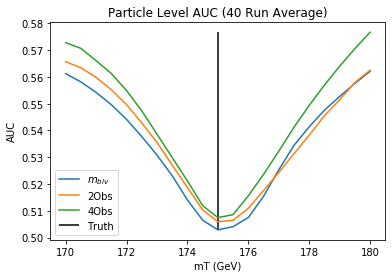

Particle Level AUC: m_blv Interpolated Minimum: 175.0
Particle Level AUC: m_blv 2nd Derivative at Minimum: -0.003297
Particle Level AUC: 2Obs Interpolated Minimum: 175.0
Particle Level AUC: 2Obs 2nd Derivative at Minimum: -0.003904
Particle Level AUC: 4Obs Interpolated Minimum: 175.0
Particle Level AUC: 4Obs 2nd Derivative at Minimum: -0.002797


In [8]:
plt.title("Particle Level AUC (40 Run Average)")

plt.plot(thetas, part_AUC_mblv_mean, label=r'$m_{bl\nu}$')
plt.plot(thetas, part_AUC_2Obs_mean, label='2Obs')
plt.plot(thetas, part_AUC_4Obs_mean, label='4Obs')
plt.vlines(
    175,
    min(np.concatenate([part_AUC_mblv_mean, part_AUC_2Obs_mean, part_AUC_4Obs_mean])),
    max(np.concatenate([part_AUC_mblv_mean, part_AUC_2Obs_mean, part_AUC_4Obs_mean])),
    label='Truth')

plt.xlabel("mT (GeV)")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-Particle-Level-AUC-40-Run-Average.png")
plt.show()

f = interpolate.interp1d(thetas, part_AUC_mblv_mean, fill_value="extrapolate")
f_min = sp.optimize.minimize(lambda x: f(x), x0=0)['x'][0]
df2 = misc.derivative(f, f_min)

print("Particle Level AUC: m_blv Interpolated Minimum: {:.1f}".format(f_min))
print("Particle Level AUC: m_blv 2nd Derivative at Minimum: {:.6f}".format(df2))

f = interpolate.interp1d(thetas, part_AUC_2Obs_mean, fill_value="extrapolate")
f_min = sp.optimize.minimize(lambda x: f(x), x0=0)['x'][0]
df2 = misc.derivative(f, f_min)

print("Particle Level AUC: 2Obs Interpolated Minimum: {:.1f}".format(f_min))
print("Particle Level AUC: 2Obs 2nd Derivative at Minimum: {:.6f}".format(df2))

f = interpolate.interp1d(thetas, part_AUC_4Obs_mean, fill_value="extrapolate")
f_min = sp.optimize.minimize(lambda x: f(x), x0=0)['x'][0]
df2 = misc.derivative(f, f_min)

print("Particle Level AUC: 4Obs Interpolated Minimum: {:.1f}".format(f_min))
print("Particle Level AUC: 4Obs 2nd Derivative at Minimum: {:.6f}".format(df2))

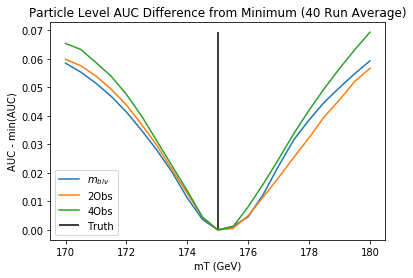

In [9]:
plt.title("Particle Level AUC Difference from Minimum (40 Run Average)")

plt.plot(thetas, part_AUC_mblv_dif, label=r'$m_{bl\nu}$')
plt.plot(thetas, part_AUC_2Obs_dif, label='2Obs')
plt.plot(thetas, part_AUC_4Obs_dif, label='4Obs')
plt.vlines(
    175,
    min(np.concatenate([part_AUC_mblv_dif, part_AUC_2Obs_dif, part_AUC_4Obs_dif])),
    max(np.concatenate([part_AUC_mblv_dif, part_AUC_2Obs_dif, part_AUC_4Obs_dif])),
    label='Truth')

plt.xlabel("mT (GeV)")
plt.ylabel("AUC - min(AUC)")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-Particle-Level-AUC-DifMin-40-Run-Average.png")
plt.show()

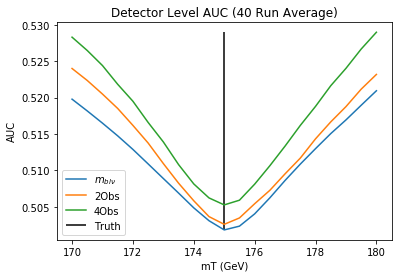

Detector Level AUC: m_blv Interpolated Minimum: 175.0
Detector Level AUC: m_blv 2nd Derivative at Minimum: -0.000413
Detector Level AUC: 2Obs Interpolated Minimum: 175.0
Detector Level AUC: 2Obs 2nd Derivative at Minimum: -0.000203
Detector Level AUC: 4Obs Interpolated Minimum: 175.0
Detector Level AUC: 4Obs 2nd Derivative at Minimum: -0.000015


In [10]:
plt.title("Detector Level AUC (40 Run Average)")

plt.plot(thetas, det_AUC_mblv_mean, label=r'$m_{bl\nu}$')
plt.plot(thetas, det_AUC_2Obs_mean, label='2Obs')
plt.plot(thetas, det_AUC_4Obs_mean, label='4Obs')
plt.vlines(
    175,
    min(np.concatenate([det_AUC_mblv_mean, det_AUC_2Obs_mean, det_AUC_4Obs_mean])),
    max(np.concatenate([det_AUC_mblv_mean, det_AUC_2Obs_mean, det_AUC_4Obs_mean])),
    label='Truth')

plt.xlabel("mT (GeV)")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-Detector-Level-AUC-40-Run-Average.png")
plt.show()

f = interpolate.interp1d(thetas, det_AUC_mblv_mean, fill_value="extrapolate")
f_min = sp.optimize.minimize(lambda x: f(x), x0=0)['x'][0]
df2 = misc.derivative(f, f_min)

print("Detector Level AUC: m_blv Interpolated Minimum: {:.1f}".format(f_min))
print("Detector Level AUC: m_blv 2nd Derivative at Minimum: {:.6f}".format(df2))

f = interpolate.interp1d(thetas, det_AUC_2Obs_mean, fill_value="extrapolate")
f_min = sp.optimize.minimize(lambda x: f(x), x0=0)['x'][0]
df2 = misc.derivative(f, f_min)

print("Detector Level AUC: 2Obs Interpolated Minimum: {:.1f}".format(f_min))
print("Detector Level AUC: 2Obs 2nd Derivative at Minimum: {:.6f}".format(df2))

f = interpolate.interp1d(thetas, det_AUC_4Obs_mean, fill_value="extrapolate")
f_min = sp.optimize.minimize(lambda x: f(x), x0=0)['x'][0]
df2 = misc.derivative(f, f_min)

print("Detector Level AUC: 4Obs Interpolated Minimum: {:.1f}".format(f_min))
print("Detector Level AUC: 4Obs 2nd Derivative at Minimum: {:.6f}".format(df2))

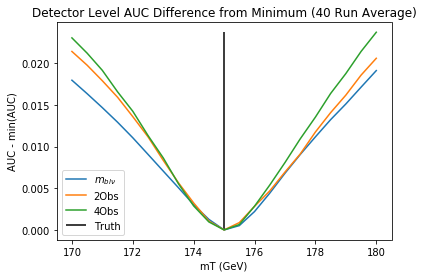

In [11]:
plt.title("Detector Level AUC Difference from Minimum (40 Run Average)")

plt.plot(thetas, det_AUC_mblv_dif, label=r'$m_{bl\nu}$')
plt.plot(thetas, det_AUC_2Obs_dif, label='2Obs')
plt.plot(thetas, det_AUC_4Obs_dif, label='4Obs')
plt.vlines(
    175,
    min(np.concatenate([det_AUC_mblv_dif, det_AUC_2Obs_dif, det_AUC_4Obs_dif])),
    max(np.concatenate([det_AUC_mblv_dif, det_AUC_2Obs_dif, det_AUC_4Obs_dif])),
    label='Truth')

plt.xlabel("mT (GeV)")
plt.ylabel("AUC - min(AUC)")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-Detector-Level-AUC-DifMin-40-Run-Average.png")
plt.show()

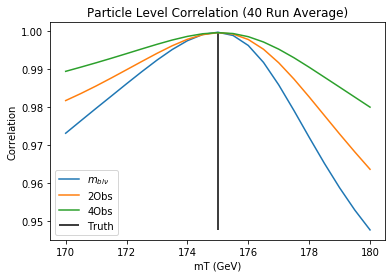

In [12]:
plt.title("Particle Level Correlation (40 Run Average)")

plt.plot(thetas, part_cor_mblv_mean, label=r'$m_{bl\nu}$')
plt.plot(thetas, part_cor_2Obs_mean, label='2Obs')
plt.plot(thetas, part_cor_4Obs_mean, label='4Obs')
plt.vlines(
    175,
    min(np.concatenate([part_cor_mblv_mean, part_cor_2Obs_mean, part_cor_4Obs_mean])),
    max(np.concatenate([part_cor_mblv_mean, part_cor_2Obs_mean, part_cor_4Obs_mean])),
    label='Truth')

plt.xlabel("mT (GeV)")
plt.ylabel("Correlation")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-Particle-Level-Correlation-40-Run-Average.png")
plt.show()

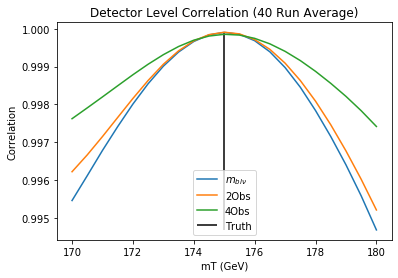

In [13]:
plt.title("Detector Level Correlation (40 Run Average)")

plt.plot(thetas, det_cor_mblv_mean, label=r'$m_{bl\nu}$')
plt.plot(thetas, det_cor_2Obs_mean, label='2Obs')
plt.plot(thetas, det_cor_4Obs_mean, label='4Obs')
plt.vlines(
    175,
    min(np.concatenate([det_cor_mblv_mean, det_cor_2Obs_mean, det_cor_4Obs_mean])),
    max(np.concatenate([det_cor_mblv_mean, det_cor_2Obs_mean, det_cor_4Obs_mean])),
    label='Truth')

plt.xlabel("mT (GeV)")
plt.ylabel("Correlation")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-Detector-Level-Correlation-40-Run-Average.png")
plt.show()

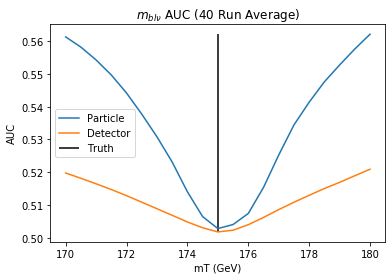

Truth Min:  175.0
Detector Min:  175.0


In [14]:
plt.title(r"$m_{bl\nu}$ AUC (40 Run Average)")

plt.plot(thetas, part_AUC_mblv_mean, label='Particle')
plt.plot(thetas, det_AUC_mblv_mean, label='Detector')
plt.vlines(
    175,
    min(np.concatenate([part_AUC_mblv_mean, det_AUC_mblv_mean])),
    max(np.concatenate([part_AUC_mblv_mean, det_AUC_mblv_mean])),
    label='Truth')
plt.xlabel("mT (GeV)")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-$m_{bl\nu}$-AUC-40-Run-Average.png")
plt.show()

print("Truth Min: ", thetas[np.argmin(part_AUC_mblv_mean)])
print("Detector Min: ", thetas[np.argmin(det_AUC_mblv_mean)])

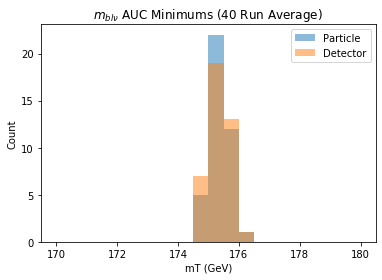

Particle Level Mean: 175.11
Particle Level Standard Deviation: 0.34
Detector Level Mean: 175.10
Detector Level Standard Deviation: 0.37


In [15]:
bins = np.linspace(170, 180, 21)
plt.title(r"$m_{bl\nu}$ AUC Minimums (40 Run Average)")

plt.hist(thetas[part_AUC_mblv_min], bins = bins, alpha = 0.5, label='Particle')
plt.hist(thetas[det_AUC_mblv_min], bins = bins, alpha = 0.5, label='Detector')
plt.xlabel("mT (GeV)")
plt.ylabel("Count")

plt.legend()
plt.show()

print("Particle Level Mean: {:.2f}".format(np.mean(thetas[part_AUC_mblv_min])))#, np.mean(thetas[AUC_6Obs_part_min]))
print("Particle Level Standard Deviation: {:.2f}".format(np.std(thetas[part_AUC_mblv_min])))

print("Detector Level Mean: {:.2f}".format(np.mean(thetas[det_AUC_mblv_min])))
print("Detector Level Standard Deviation: {:.2f}".format(np.std(thetas[det_AUC_mblv_min])))

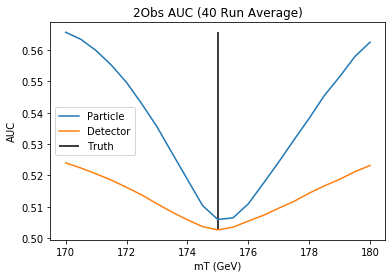

Truth Min:  175.0
Detector Min:  175.0


In [16]:
plt.title(r"2Obs AUC (40 Run Average)")

plt.plot(thetas, part_AUC_2Obs_mean, label='Particle')
plt.plot(thetas, det_AUC_2Obs_mean, label='Detector')
plt.vlines(
    175,
    min(np.concatenate([part_AUC_2Obs_mean, det_AUC_2Obs_mean])),
    max(np.concatenate([part_AUC_2Obs_mean, det_AUC_2Obs_mean])),
    label='Truth')
plt.xlabel("mT (GeV)")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-2Obs-AUC-40-Run-Average.png")
plt.show()

print("Truth Min: ", thetas[np.argmin(part_AUC_2Obs_mean)])
print("Detector Min: ", thetas[np.argmin(det_AUC_2Obs_mean)])

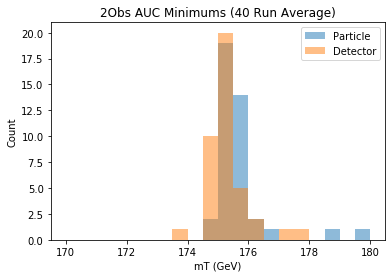

Particle Level Mean: 175.45
Particle Level Standard Deviation: 0.97
Detector Level Mean: 175.06
Detector Level Standard Deviation: 0.67


In [17]:
bins = np.linspace(170, 180, 21)
plt.title(r"2Obs AUC Minimums (40 Run Average)")

plt.hist(thetas[part_AUC_2Obs_min], bins = bins, alpha = 0.5, label='Particle')
plt.hist(thetas[det_AUC_2Obs_min], bins = bins, alpha = 0.5, label='Detector')
plt.xlabel("mT (GeV)")
plt.ylabel("Count")

plt.legend()
plt.show()

print("Particle Level Mean: {:.2f}".format(np.mean(thetas[part_AUC_2Obs_min])))
print("Particle Level Standard Deviation: {:.2f}".format(np.std(thetas[part_AUC_2Obs_min])))

print("Detector Level Mean: {:.2f}".format(np.mean(thetas[det_AUC_2Obs_min])))
print("Detector Level Standard Deviation: {:.2f}".format(np.std(thetas[det_AUC_2Obs_min])))

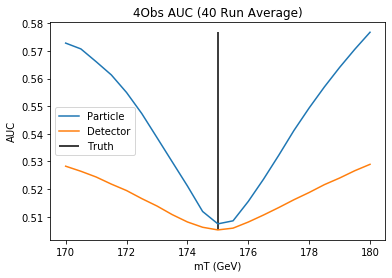

Truth Min:  175.0
Detector Min:  175.0


In [18]:
plt.title(r"4Obs AUC (40 Run Average)")

plt.plot(thetas, part_AUC_4Obs_mean, label='Particle')
plt.plot(thetas, det_AUC_4Obs_mean, label='Detector')
plt.vlines(
    175,
    min(np.concatenate([part_AUC_4Obs_mean, det_AUC_4Obs_mean])),
    max(np.concatenate([part_AUC_4Obs_mean, det_AUC_4Obs_mean])),
    label='Truth')
plt.xlabel("mT (GeV)")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-4Obs-AUC-40-Run-Average.png")
plt.show()

print("Truth Min: ", thetas[np.argmin(part_AUC_4Obs_mean)])
print("Detector Min: ", thetas[np.argmin(det_AUC_4Obs_mean)])

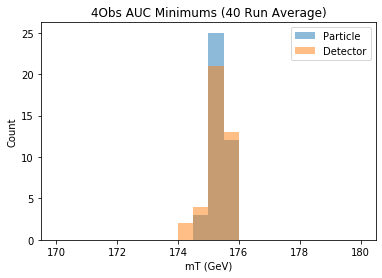

Particle Level Mean: 175.11
Particle Level Standard Deviation: 0.28
Detector Level Mean: 175.06
Detector Level Standard Deviation: 0.39


In [19]:
bins = np.linspace(170, 180, 21)
plt.title(r"4Obs AUC Minimums (40 Run Average)")

plt.hist(thetas[part_AUC_4Obs_min], bins = bins, alpha = 0.5, label='Particle')
plt.hist(thetas[det_AUC_4Obs_min], bins = bins, alpha = 0.5, label='Detector')
plt.xlabel("mT (GeV)")
plt.ylabel("Count")

plt.legend()
plt.show()

print("Particle Level Mean: {:.2f}".format(np.mean(thetas[part_AUC_4Obs_min])))
print("Particle Level Standard Deviation: {:.2f}".format(np.std(thetas[part_AUC_4Obs_min])))

print("Detector Level Mean: {:.2f}".format(np.mean(thetas[det_AUC_4Obs_min])))
print("Detector Level Standard Deviation: {:.2f}".format(np.std(thetas[det_AUC_4Obs_min])))

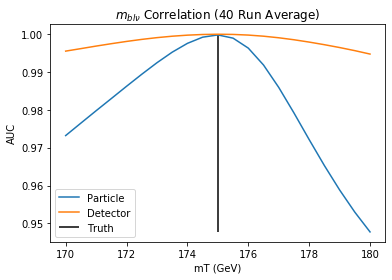

Truth Max:  175.0
Detector Max:  175.0


In [20]:
plt.title(r"$m_{bl\nu}$ Correlation (40 Run Average)")

plt.plot(thetas, part_cor_mblv_mean, label='Particle')
plt.plot(thetas, det_cor_mblv_mean, label='Detector')
plt.vlines(
    175,
    min(np.concatenate([part_cor_mblv_mean, det_cor_mblv_mean])),
    max(np.concatenate([part_cor_mblv_mean, det_cor_mblv_mean])),
    label='Truth')
plt.xlabel("mT (GeV)")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-$m_{bl\nu}$-cor-40-Run-Average.png")
plt.show()

print("Truth Max: ", thetas[np.argmax(part_cor_mblv_mean)])
print("Detector Max: ", thetas[np.argmax(det_cor_mblv_mean)])

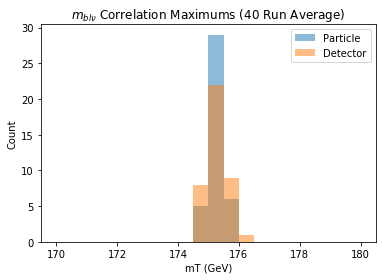

Particle Level Mean: 175.01
Particle Level Standard Deviation: 0.26
Detector Level Mean: 175.04
Detector Level Standard Deviation: 0.36


In [21]:
bins = np.linspace(170, 180, 21)
plt.title(r"$m_{bl\nu}$ Correlation Maximums (40 Run Average)")

plt.hist(thetas[part_cor_mblv_max], bins = bins, alpha = 0.5, label='Particle')
plt.hist(thetas[det_cor_mblv_max], bins = bins, alpha = 0.5, label='Detector')
plt.xlabel("mT (GeV)")
plt.ylabel("Count")

plt.legend()
plt.show()

print("Particle Level Mean: {:.2f}".format(np.mean(thetas[part_cor_mblv_max])))#, np.mean(thetas[AUC_6Obs_part_min]))
print("Particle Level Standard Deviation: {:.2f}".format(np.std(thetas[part_cor_mblv_max])))

print("Detector Level Mean: {:.2f}".format(np.mean(thetas[det_cor_mblv_max])))
print("Detector Level Standard Deviation: {:.2f}".format(np.std(thetas[det_cor_mblv_max])))

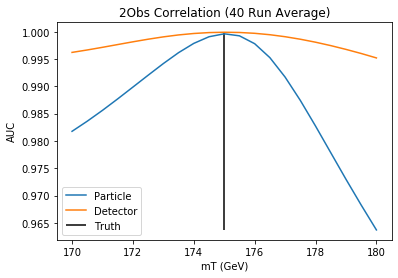

Truth Max:  175.0
Detector Max:  175.0


In [22]:
plt.title(r"2Obs Correlation (40 Run Average)")

plt.plot(thetas, part_cor_2Obs_mean, label='Particle')
plt.plot(thetas, det_cor_2Obs_mean, label='Detector')
plt.vlines(
    175,
    min(np.concatenate([part_cor_2Obs_mean, det_cor_2Obs_mean])),
    max(np.concatenate([part_cor_2Obs_mean, det_cor_2Obs_mean])),
    label='Truth')
plt.xlabel("mT (GeV)")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-2Obs-cor-40-Run-Average.png")
plt.show()

print("Truth Max: ", thetas[np.argmax(part_cor_2Obs_mean)])
print("Detector Max: ", thetas[np.argmax(det_cor_2Obs_mean)])

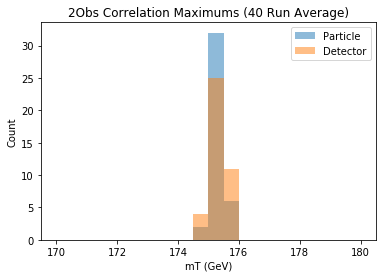

Particle Level Mean: 175.05
Particle Level Standard Deviation: 0.22
Detector Level Mean: 175.09
Detector Level Standard Deviation: 0.29


In [23]:
bins = np.linspace(170, 180, 21)
plt.title(r"2Obs Correlation Maximums (40 Run Average)")

plt.hist(thetas[part_cor_2Obs_max], bins = bins, alpha = 0.5, label='Particle')
plt.hist(thetas[det_cor_2Obs_max], bins = bins, alpha = 0.5, label='Detector')
plt.xlabel("mT (GeV)")
plt.ylabel("Count")

plt.legend()
plt.show()

print("Particle Level Mean: {:.2f}".format(np.mean(thetas[part_cor_2Obs_max])))
print("Particle Level Standard Deviation: {:.2f}".format(np.std(thetas[part_cor_2Obs_max])))

print("Detector Level Mean: {:.2f}".format(np.mean(thetas[det_cor_2Obs_max])))
print("Detector Level Standard Deviation: {:.2f}".format(np.std(thetas[det_cor_2Obs_max])))

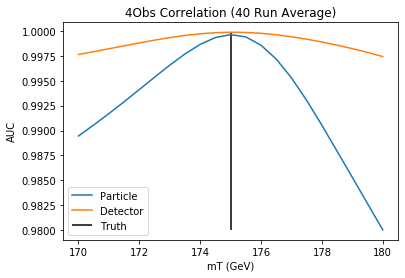

Truth Max:  175.0
Detector Max:  175.0


In [24]:
plt.title(r"4Obs Correlation (40 Run Average)")

plt.plot(thetas, part_cor_4Obs_mean, label='Particle')
plt.plot(thetas, det_cor_4Obs_mean, label='Detector')
plt.vlines(
    175,
    min(np.concatenate([part_cor_4Obs_mean, det_cor_4Obs_mean])),
    max(np.concatenate([part_cor_4Obs_mean, det_cor_4Obs_mean])),
    label='Truth')
plt.xlabel("mT (GeV)")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-4Obs-cor-40-Run-Average.png")
plt.show()

print("Truth Max: ", thetas[np.argmax(part_cor_4Obs_mean)])
print("Detector Max: ", thetas[np.argmax(det_cor_4Obs_mean)])

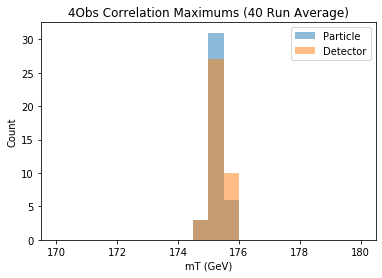

Particle Level Mean: 175.04
Particle Level Standard Deviation: 0.23
Detector Level Mean: 175.09
Detector Level Standard Deviation: 0.27


In [25]:
bins = np.linspace(170, 180, 21)
plt.title(r"4Obs Correlation Maximums (40 Run Average)")

plt.hist(thetas[part_cor_4Obs_max], bins = bins, alpha = 0.5, label='Particle')
plt.hist(thetas[det_cor_4Obs_max], bins = bins, alpha = 0.5, label='Detector')
plt.xlabel("mT (GeV)")
plt.ylabel("Count")

plt.legend()
plt.show()

print("Particle Level Mean: {:.2f}".format(np.mean(thetas[part_cor_4Obs_max])))
print("Particle Level Standard Deviation: {:.2f}".format(np.std(thetas[part_cor_4Obs_max])))

print("Detector Level Mean: {:.2f}".format(np.mean(thetas[det_cor_4Obs_max])))
print("Detector Level Standard Deviation: {:.2f}".format(np.std(thetas[det_cor_4Obs_max])))

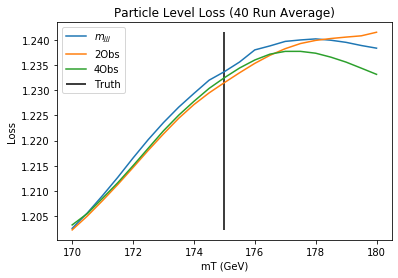

In [26]:
plt.title("Particle Level Loss (40 Run Average)")

plt.plot(thetas, part_lvals_mblv_mean, label='$m_{jjj}$')
plt.plot(thetas, part_lvals_2Obs_mean, label='2Obs')
plt.plot(thetas, part_lvals_4Obs_mean, label='4Obs')
plt.vlines(
    175,
    min(np.concatenate([part_lvals_mblv_mean, part_lvals_2Obs_mean, part_lvals_4Obs_mean])),
    max(np.concatenate([part_lvals_mblv_mean, part_lvals_2Obs_mean, part_lvals_4Obs_mean])),
    label='Truth')
plt.xlabel("mT (GeV)")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-Particle-Level-Loss-40-Run-Average.png")
plt.show()

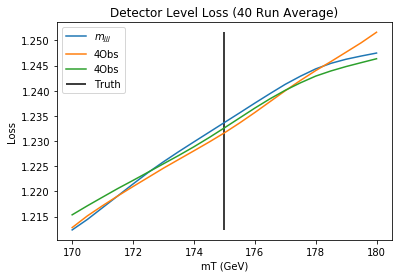

In [27]:
plt.title("Detector Level Loss (40 Run Average)")

plt.plot(thetas, det_lvals_mblv_mean, label='$m_{jjj}$')
plt.plot(thetas, det_lvals_2Obs_mean, label='4Obs')
plt.plot(thetas, det_lvals_4Obs_mean, label='4Obs')
plt.vlines(
    175,
    min(np.concatenate([det_lvals_mblv_mean, det_lvals_2Obs_mean, det_lvals_4Obs_mean])),
    max(np.concatenate([det_lvals_mblv_mean, det_lvals_2Obs_mean, det_lvals_4Obs_mean])),
    label='Truth')
plt.xlabel("mT (GeV)")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("DCTR_1D_mT-EnsembleDataProcessing-Detector-Level-Loss-40-Run-Average.png")
plt.show()